# Classification

Le partitionnement de données (*clustering* en anglais), ou inversement leur regroupement, permet de créer des ensembles selon leur similarité. Le partitionnement permet de créer des groupes selon l'information que l'on fait émerger des données. Les objets peuvent être classés selon leurs dimensions, leurs couleurs, leurs signature chimique, leurs comportements, leurs gènes, etc. 

Plusieurs méthodes sont aujourd'hui offertes aux analystes pour partiotionner leurs données. Dans le cadre de ce manuel, nous retenons deux grandes tendances dans les algorithmes.

1. *Méthodes hiérarchique et non hiérarchiques*. Dans partitionnement hiérarchique, l'ensemble des objets forme un groupe, comprenant des sous-regroupements, des sous-sous-regroupements, etc., dont les objets forment l'ultime partitionnement. On pourra alors identifier comment se décline un partitionnement. À l'inverse, un partitionnement non-hiérarchique demande à ce que le nombre de groupe soit préalablement fixé, puis des algorhitmes permettent de créer les groupes non hiérarchisés en faisant en sorte que les groupes soient les plus différents que possible.

2. *Agglomération ou division*. Pour créer des groupes hiérarchiques, on peut passer par l'agglomération: on regroupe les objets similaires jusqu'à créer un seul groupe. À l'inverse, la division consiste à partitionner les observations en sous-groupes jusqu'à ce que chaque groupe ne contienne qu'une seule observation.

3. *Membership exclusif ou flou*. Certaines techniques attribuent à chaque une classe unique: l'appartenance sera indiquée par un 1 et la non appartenance par un 0. D'autres techniques vont attribuer un membership flou où le degré d'appartenance est une variable continue de 0 à 1. Parmi les méthodes floues, on retrouve les méthodes probabilistes.

## Classification hiérarchique

### Similarité

La similarité, ou inversement la dissimilarité, est le résultat d'un calcul de distance entre les objets.

... types de distance.

Le partitionnement hiérarchique est typiquement effectué avec une des quatres méthodes suivantes.

In [33]:
clustering_methods = ['single', 'complete', 'average', 'weighted', 'centroid', 'median', 'ward']

Chacune possède ses particularité.

**Single linkage**. Cette méthode est aglomérative. À chaque étape d'agglomération, on fusionne les deux groupes ayant le plus d'affinité sur la base des deux sous-groupes les plus rapprochés.

**Complete**. La méthode *complete* est aussi agglomérative.À la différence de la méthode *single*, on considère comme critère d'agglomération les éléments les plus éloignés.

**Average**. Cette méthode est aussi agglomérative, mais le regroupement est basé sur la moyenne du groupe plutôt que sur ses extrêmes.

**Median**. Plutôt que la moyenne, il est aussi possible d'utiliser un autre indicateur de tendance centrale: la médiane, réputée pour être plus robuste.

**Weighted**. 

**Centroid**. 

**Ward**. 

# Ordination

En écologie, biologie, agronommie comme en foresterie, la plupart des tableaux de données comprennent de nombreuses variables: pH, nutriments, climat, espèces ou cultivars, etc. L'ordination vise à mettre de l'ordre dans des données dont le nombre élevé de variables peut amener à des difficultés d'interprétaion ([Legendre et Legendre, 2012](https://www.elsevier.com/books/numerical-ecology/legendre/978-0-444-53868-0)). Plus précisément, le terme ordination est utilisé en écologie pour désigner les techniques de réduction d'axe.

L'analyse en composante principale est probablement la plus connue de ces techniques. De nombreuses techniques d'ordination ont été développées au cours des dernières années, chacune ayant ses domaines d'application. Ce manuel en couvrira quelques unes.

## Biplot

Pour créer un biplot, on juxtapose les descripteurs (variables), représentés par des flèches, et les objets (observations), représentés par des points. Les résultats d'une ordination peuvent être présentés selon deux types de biplots ([Legendre et Legendre, 2012](https://www.elsevier.com/books/numerical-ecology/legendre/978-0-444-53868-0)).

![](https://upload.wikimedia.org/wikipedia/commons/f/f6/Biplot_of_Anderson's_Iris_data_set.svg)
<center>Biplot effectué sur des données de dimension d'espèces d'iris. Source: [Wikipedia](https://en.wikipedia.org/wiki/Biplot)</center>

**Biplot de distance**. Ce type de projection permet de visualiser la position des objets entre eux et par rapport aux descripteurs et d'apprécier la contribution des descripteurs pour créer les composantes principales. Pour créer un biplot de distance, on projette directement les vecteurs propres ($U$) en guise de descripteurs. Pour ce qui est des objets, on utilise les scores de l'ACP ($F$). De cette manière, 

1. les distances euclidiennes entre les scores sont des approximations des distances euclidiennes dans l'espace multidimentionnel,
2. la projection d'un objet sur un descripteur perpendiculairement à ce dernier est une approximation de la position de l'objet sur le descripteur et
3. la projection d'un descripteur sur un axe principal est proportionnelle à sa contribution pour générer l'axe.

**Biplot de corrélation**. Cette projection permet d'apprécier les corrélations entre les descripteurs. Pour ce faire, les objets et les valeurs propres doivent être transformés. Pour générer les descripteurs, les vecteurs propres ($U$) doivent être multipliés par la matrice diagonalisée de la racine carrée des valeurs propres ($\Lambda$), c'est-à-dire $U \Lambda ^{\frac{1}{2}}$. En ce qui a trait aux objets, on multiplie les scores par ($F$) par la racine carrée négative des valeurs propres diagonalisées, c'est-à-dire $F \Lambda ^{- \frac{1}{2}}$. De cette manière, 

1. tout comme c'est le cas pour le biplot de distance, la projection d'un objet sur un descripteur perpendiculairement à ce dernier est une approximation de la position de l'objet sur le descripteur,
2. la projection d'un descripteur sur un axe principal est proportionnelle à son écart-type et
3. les angles entre les descripteurs sont proportionnelles à leur corrélation.

En d'autres mots, le bilot de distances devrait être utilisé pour apprécier la distance entre les objets et le biplot de corrélation devrait être utilisé pour apprécier les corrélations entre les descripteurs. Mais dans tous les cas, le type de biplot utilisé devrait être indiqué, au moins dans le titre de la figure.

Les fonctions suivantes permettront de créer des biplots en Python, grâce à la librairie graphique `matplotlib`. Nous les utiliserons plus loin.

In [1]:
from scipy.stats import f as ssf
def ellipse(X, level=0.95, method='deviation', npoints=100):
    cov_mat = np.cov(X.T)
    dfd = X.shape[0]-1
    dfn = 2
    center = np.apply_along_axis(np.mean, arr=X, axis=0) # np.mean(X, axis=0)
    if method == 'deviation':
        radius = np.sqrt(2 * ssf.ppf(q=level, dfn=dfn, dfd=dfd))
    elif method == 'error':
        radius = np.sqrt(2 * ssf.ppf(q=level, dfn=dfn, dfd=dfd)) / np.sqrt(X.shape[0])
    angles = (np.arange(0,npoints+1)) * 2 * np.pi/npoints
    circle = np.vstack((np.cos(angles), np.sin(angles))).T
    ellipse = center + (radius * np.dot(circle, np.linalg.cholesky(cov_mat).T).T).T
    return ellipse

In [2]:
def biplot(objects, eigenvectors, eigenvalues=None, 
           labels=None, scaling=1, xpc=0, ypc=1,
           group=None, plot_ellipses=False, axis_label='PC'):
    
    # select scaling
    if scaling == 1 or scaling == 'distance':
        scores = objects[:, [xpc, ypc]]
        loadings = eigenvectors[[xpc, ypc], :]
    elif scaling == 2 or scaling == 'correlation':
        scores = objects.dot(np.diag(eigenvalues**(-0.5)))[:, [xpc, ypc]]
        loadings = eigenvectors.dot(np.diag(eigenvalues**0.5))
    
    # draw the cross
    plt.axvline(0, ls='solid', c='k')
    plt.axhline(0, ls='solid', c='k')
    
    # draw the ellipses
    if group is not None and plot_ellipses:
        groups = np.unique(group)
        for i in range(len(groups)):
            mean = np.mean(scores[group==groups[i], :], axis=0)
            plt.text(mean[0], mean[1], groups[i],
                     ha='center', va='center', color='k', size=15)
            ell_dev = ellipse(X=scores[group==groups[i], :], level=0.95, method='deviation')
            ell_err = ellipse(X=scores[group==groups[i], :], level=0.95, method='error')
            plt.fill(ell_err[:,0], ell_err[:,1], alpha=0.6, color='grey')
            plt.fill(ell_dev[:,0], ell_dev[:,1], alpha=0.2, color='grey')
    
    # plot scores
    if group is None:
        plt.scatter(scores[:,xpc], scores[:,ypc])
    else:
        for i in range(len(np.unique(group))):
            cond = group == np.unique(group)[i]
            plt.plot(scores[cond, 0], scores[cond, 1], 'o')
    
    # plot loadings
    for i in range(loadings.shape[1]):
        plt.arrow(0, 0, loadings[xpc, i], loadings[ypc, i], 
                  color = 'black', head_width=np.ptp(objects)/100)
    
    # plot loading labels
    if labels is not None:
        for i in range(loadings.shape[1]):
            plt.text(loadings[xpc, i]*1.2, loadings[ypc, i]*1.2, labels[i], 
                     color = 'black', ha = 'center', va = 'center')
    
    # axis labels
    plt.xlabel(axis_label + str(xpc+1))
    plt.ylabel(axis_label + str(ypc+1))

## Ordination non contraignante
### Analyse en composantes principales
ACP et LDA
https://python-for-multivariate-analysis.readthedocs.io/a_little_book_of_python_for_multivariate_analysis.html


NOTE. À insérer après avoir introduit les ACP, les vecteurs et valeurs propres.






#### ACP en Python

L'ACP sera effectuée avec `scikit-learn`.

Malheureusement, les bibliothèques disponnibles en Python ne comprennent pas de fonctions pour générer des biplots en bonne et due forme. Heureusement, nous avons les connaissances et outils pour les générer. Effectuons un biplot sur les données de dimension des iris. 

In [3]:
%pylab inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.decomposition import PCA

Populating the interactive namespace from numpy and matplotlib


Chargeons les données des iris.

In [4]:
iris = datasets.load_iris()
dir(iris)

['DESCR', 'data', 'feature_names', 'target', 'target_names']

In [5]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], 
      dtype='<U10')

Les données de l'objet `iris` sont enchâssées dans un dictionnaire. Les dimensions sont une matrice se situent sous la clé `data` et les noms des colonnes sont placés sous la clé `feature_names`.

In [6]:
X = iris.data
y = iris.target
labels = iris.feature_names

In [7]:
list(zip(['setosa', 'versicolor', 'virginica'], [0, 1, 2]))

[('setosa', 0), ('versicolor', 1), ('virginica', 2)]

In [8]:
y_name = []
for i in range(len(y)):
    if y[i] == 0:
        y_name.append('setosa')
    elif y[i] == 1:
        y_name.append('versicolor')
    elif y[i] == 2:
        y_name.append('virginica')
y_name = np.array(y_name)

Effectuons l'ACP et demandons le nombre maximum d'axes, égal au nombre de colonnes de la matrice.

In [9]:
pca = PCA(n_components=X.shape[1]).fit(X)

Les objets peuvent ensuite être calculés. 

In [10]:
X_r = pca.transform(X)

Les vecteurs et valeurs propres peuvent être récupérées.

In [11]:
eigenvectors_pca = pca.components_
eigenvalues_pca = pca.explained_variance_

NOTE. Analyse des valeurs propres.

In [12]:
pd.DataFrame(eigenvectors_pca, index=iris.feature_names)

,0,1,2,3
sepal length (cm),0.361590,-0.082269,0.856572,0.358844
sepal width (cm),0.656540,0.729712,-0.175767,-0.074706
petal length (cm),-0.580997,0.596418,0.072524,0.549061
petal width (cm),0.317255,-0.324094,-0.479719,0.751121


Les vecteurs propres devraient être de longueur unitaire.

In [13]:
np.linalg.norm(x=eigenvectors_pca, axis=1)

array([ 1.,  1.,  1.,  1.])

Lançons la fonction `biplot`, créée plus haut.

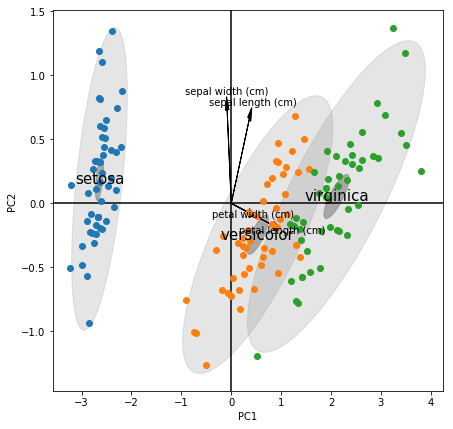

In [14]:
plt.figure(figsize=(7, 7))
biplot(objects=X_r,
       eigenvectors=eigenvectors_pca,
       eigenvalues=eigenvalues_pca,
       scaling='distance',
       labels=labels,
       xpc=0, ypc=1,
      group=y_name,
      plot_ellipses=True)

Les scores dans l'espace des composantes principales des trois espèces sont séparées en grande partie par la variable `petal_length`, et un peu moins par la variable `petal_width`. Les dimensions des sépales, qui créent en majeure partie le second axe principal, ne semblent pas bien séparer les groupes. Ceci peut d'ailleurs être confirmé par un aperçu des histogrammes.

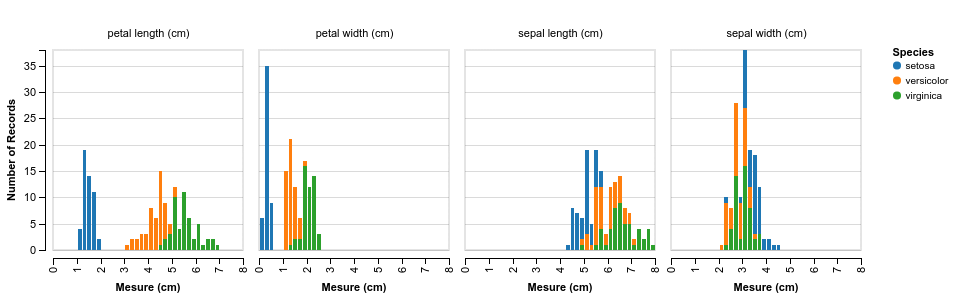

In [17]:
import altair as al
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_df['Species'] = pd.Categorical.from_codes(iris.target, iris.target_names)
iris_m = iris_df.melt(id_vars='Species')
al.Chart(iris_m).mark_bar().encode(
    x=al.X('value', bin=al.Bin(maxbins=50.0), title='Mesure (cm)'),
    y='count(*)',
    column=al.Column('variable', title=' '),
    color='Species').configure_cell(height=200, width=190)

### Analyse de correspondance

### Analyse en coordonnées principales

### Analyse manifold

## Ordination contraignante

Alors que l'ordination non contraignante vous permet de dresser un protrait de vos variables, l'ordination contraignante (ou canonique) permet de tester statistiquement ainsi que de représenter la relation entre plusieurs variables explicatives (par exemple, des conditions environnementales) et une ou plusieurs variables réponses (par exemple, les espèces observées). 

- L'analyse discriminante n'a fondamentalement qu'une seulement variable réponse, et celle-ci doit décrire l'appartenance à une catégorie.
- L'analyse canonique des corrélations sera préférée lorsque les variables sont étalées (comme les variables d'abondance).
- L'analyse de redondance sera préférée lorsque le nombre de variable est plus restreint (variables ionomiques et indicateurs de performance des cultures). Les détails, ainsi que les tenants et aboutissants de ces méthodes, sont présentés dans [Numerical Ecology (Legendre et Legendre, 2012)](https://www.elsevier.com/books/numerical-ecology/legendre/978-0-444-53868-0).

### Analyse discriminante linéaire

...

Utilisons de nouveau les données d'iris.

In [18]:
X = iris.data
y = iris.target
labels = iris.feature_names

In [19]:
from sklearn import preprocessing
X_n = preprocessing.scale(X, axis=0)

In [20]:
X_n.std(axis=0)

array([ 1.,  1.,  1.,  1.])

In [21]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis(solver='eigen')
lda.fit(X=X_n, y=y_name)

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
              solver='eigen', store_covariance=False, tol=0.0001)

In [22]:
objects_lda = lda.transform(X_n)
eigenvectors_lda = lda.scalings_.T
eigenvalues_lda = lda.explained_variance_ratio_

In [23]:
pd.DataFrame(lda.scalings_, index=iris.feature_names)

,0,1,2,3
sepal length (cm),0.149776,0.009529,0.256594,-0.844612
sepal width (cm),0.148173,0.327193,-0.174391,0.102779
petal length (cm),-0.851122,-0.574820,-0.802419,0.329028
petal width (cm),-0.480836,0.749957,0.509775,0.409643


In [24]:
eigenvectors_lda

array([[ 0.1497757 ,  0.14817298, -0.85112189, -0.48083628],
       [ 0.0095293 ,  0.32719336, -0.57482034,  0.74995684],
       [ 0.25659397, -0.17439117, -0.80241908,  0.50977531],
       [-0.84461196,  0.10277876,  0.32902823,  0.40964325]])

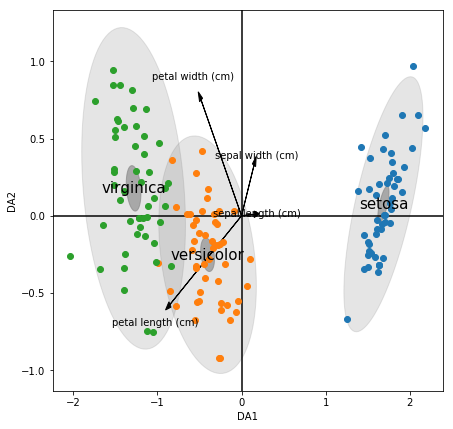

In [25]:
plt.figure(figsize=(7, 7))
biplot(objects=objects_lda,
       eigenvectors=eigenvectors_lda,
       labels=labels,
       axis_label = 'DA',
       group=y_name,
       plot_ellipses=True)

À la différence de l'ACP, l'ADL maximise la sépatation des groupes. Nous avions noté avec l'ACP que les dimensions des pétales distingaient les groupes. Puisque nous avions justement des informations sur les groupes, nous aurions pu procéder directement à un ADL pour obtenir des conclusions plus directes. Si la longueur des pétales permet de distinguer l'espèce *setosa* des deux autres, la largeur des pétales permet de distinguer *virginica* et *versicolor*, bien que les nuages de points se superposent. De manière bivariée, les régions de confiance des moyennes des scores discriminants (petites ellipses) montrent des différence significatives au seuil 0.05. 

### Analyse canonique des corrélations

L'analyse canonique des corrélations a été à l'origine conçue pour étudier les liens entre des variables environnementales et l'abondance (décompte) ou l'occurence (présence-absence) d'espèces ([Ter Braak, 1986](https://www.ohio.edu/plantbio/staff/mccarthy/multivariate/terBraak1986.pdf)). Cette technique maximise la séparation entre les espèces. Plus on y ajoute de variables environnementales, plus l'ordination sera semblable à une ACP: il est donc conseillé de limiter le nombre de variables explicatives.

### Analyse de redondance

En anglais, on la nomme *redundancy analysis*, souvent abrégée RDA. Elle est utilisée pour résumer les relations linéaires entre des variables réponse et des variables explicatives. La "redondance" se situe dans l'utilisation de deux tableaux de données contenant de l'information concordante. L'analyse de redondante est une manière élégante d'effectuer une régresssion linéaire multiple, où la matrice de valeurs prédites par la régression est assujettie à une analyse en composantes principales. Il est ainsi possible de superposer les scores des variables explicatives à ceux des variables réponse.



## RDA en Python

Les tableaux [`varespec`](https://rdrr.io/rforge/vegan/man/varespec.html) et [`varechem`](https://rdrr.io/rforge/vegan/man/varechem.html) comprennent respectivement des données d'abondance d'espèces et d'environnements (tirées du module [`vegan`](https://rdrr.io/rforge/vegan/), langage R).

In [26]:
import pandas as pd
from skbio.stats.ordination import rda, cca

In [27]:
varespec = pd.read_csv('data/varespec.csv', delimiter=';')
varechem = pd.read_csv('data/varechem.csv', delimiter=';')

Il est difficile d'appréhender. Comme nous l'avons vu précdemment, les données de concentration sont de type *compositionnelles*.

In [28]:
# TRANSFORMER EN CLR

In [29]:
cca_vare = cca(y=varespec, x=varechem, scaling=1)

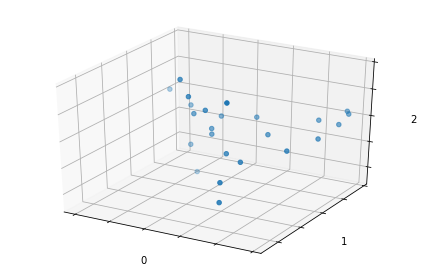

In [30]:
# cca_vare.features # species
# cca_vare.samples # sites
cca_vare

Pour représenter une RDA ou une CCA, on utilise souvent le triplot, qui comprend les sites (ici en noir), les variables réponse (rouge) et les variables explicatives (bleu).

(-3.3382849600003377, 2.584920755277718)

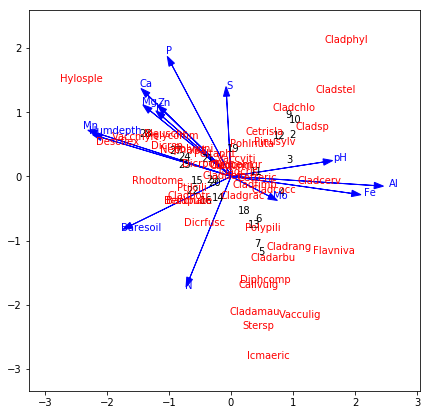

In [31]:
plt.figure(figsize=(7, 7))

# sites
for i in range(len(cca_vare.samples.index.values)):
    plt.text(x=cca_vare.samples.iloc[i,0], 
             y=cca_vare.samples.iloc[i,1], 
             s = cca_vare.samples.index.values[i], 
             color='black')

# species
for i in range(len(cca_vare.features.index.values)):
    plt.text(x=cca_vare.features.iloc[i,0], 
             y=cca_vare.features.iloc[i,1], 
             s = cca_vare.features.index.values[i], 
             color='red')

# scores
expand_scores = 3
margin_score_labels = 0.3
for i in range(len(cca_vare.biplot_scores.index.values)):
    plt.arrow(0, 0, 
              cca_vare.biplot_scores.iloc[i,0]*expand_scores, 
              cca_vare.biplot_scores.iloc[i,1]*expand_scores, 
              color = 'blue', head_width=.1)
    plt.text(x=cca_vare.biplot_scores.iloc[i,0]*(expand_scores + margin_score_labels), 
             y=cca_vare.biplot_scores.iloc[i,1]*(expand_scores + margin_score_labels), 
             s = cca_vare.biplot_scores.index.values[i], 
             color='blue')

# amalgamate all the values to define the limits in X and Y
allX = np.hstack((cca_vare.features.iloc[:,0], 
                  cca_vare.biplot_scores.iloc[:,0]*(expand_scores + margin_score_labels), 
                  cca_vare.samples.iloc[:,0]))
allY = np.hstack((cca_vare.features.iloc[:,1], 
                  cca_vare.biplot_scores.iloc[:,1]*(expand_scores + margin_score_labels), 
                  cca_vare.samples.iloc[:,1]))
margin_plot = 0.5

plt.xlim([np.min(allX)-margin_plot, np.max(allX)+margin_plot])
plt.ylim([np.min(allY)-margin_plot, np.max(allY)+margin_plot])

## Résumé

Tableau quelle analyse sélectionner? Faire un flow chart.